#### Import the libraries

In [9]:
# Import libraries and packages
# Miscellaneous libraries
import numpy as np
import pandas as pd
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sn

#### Define the path of the files

In [10]:
# Define the path of the data files
path = '../data/raw/'
path_git_commits = path + 'GIT_COMMITS.csv'
path_git_commits_changes = path + 'GIT_COMMITS_CHANGES.csv'
path_jira_issues = path + 'JIRA_ISSUES.csv'
path_sonar_analysis = path + 'SONAR_ANALYSIS.csv'
path_sonar_issues = path + 'SONAR_ISSUES.csv'
path_sonar_measures = path + 'SONAR_MEASURES.csv'

# Ensure the input file exist
assert os.path.isfile(path_git_commits), f'{path_git_commits} not found. Is it a file?'
assert os.path.isfile(path_git_commits_changes), f'{path_git_commits_changes} not found. Is it a file?'
assert os.path.isfile(path_jira_issues), f'{path_jira_issues} not found. Is it a file?'
assert os.path.isfile(path_sonar_analysis), f'{path_sonar_analysis} not found. Is it a file?'
assert os.path.isfile(path_sonar_issues), f'{path_sonar_issues} not found. Is it a file?'
assert os.path.isfile(path_sonar_measures), f'{path_sonar_measures} not found. Is it a file?'

#### Read the files

In [11]:
# Reade the files
#git_commits_changes = pd.read_csv(path_git_commits_changes)
git_commits = pd.read_csv(path_git_commits)
jira_issues = pd.read_csv(path_jira_issues)
sonar_analysis = pd.read_csv(path_sonar_analysis)
sonar_issues = pd.read_csv(path_sonar_issues)
sonar_measures = pd.read_csv(path_sonar_measures)

#### Define selected variables

In [4]:
# Define variables of intereset for each dataframe
git_commits_changes_names = ['FILE','COMMIT_HASH','DATE','LINES_ADDED','LINES_REMOVED']
git_commits_names = ['PROJECT_ID','COMMIT_HASH','AUTHOR','COMMITER_DATE']
jira_issues_names = ['HASH']
sonar_analysis_names = ['PROJECT_ID','ANALYSIS_KEY','REVISION']
sonar_issues_names = ['CREATION_ANALYSIS_KEY','SEVERITY','STATUS','EFFORT','START_LINE','END_LINE','CLOSE_ANALYSIS_KEY']
sonar_measures_names = ['analysis_key', 'cognitive_complexity', 'coverage', 'duplicated_blocks', 'duplicated_files', 
                        'duplicated_lines_density', 'wont_fix_issues', 'files', 'comment_lines_density']

In [5]:
# Select variables of interest
git_commits = git_commits[git_commits_names]
jira_issues = jira_issues[jira_issues_names]
sonar_analysis = sonar_analysis[sonar_analysis_names]
sonar_issues = sonar_issues[sonar_issues_names]
sonar_measures = sonar_measures[sonar_measures_names]

# Describe data

In [54]:
def describe_variables(dataframe):
    '''
    Objective:
        - Obtain a stadistical summary of the variables
    Input:
        - Table with the selected columns
    Output: 
        For continuous variables:
            - Count : Number of non-null observations
            - Mean : Mean of values
            - Std : Standard Deviation of the Values
            - min : Minimum Value
            - Max : Maximum Value
            - Percentiles 25%,50%,75%
        For categorical variables:
            - Count : Number of non-null observations
            Unique : Number of classes
            top : Class that has more ocurrences
            freq : Ocurrences of the top class
    '''
    dataframe_cont = dataframe.select_dtypes(include=['float64'])
    dataframe_cat = dataframe.select_dtypes(exclude=['float64'])
    
    cont_empty = dataframe_cont.empty
    cat_empty = dataframe_cat.empty
    
    if not cont_empty and not cat_empty:
        return (dataframe_cont.describe(), dataframe_cat.describe())
    elif cont_empty and not cat_empty:
        return (dataframe_cat.describe())
    elif not cont_empty and cat_empty:
        return (dataframe_cont.describe())
    else:
        assert 'The dataframe is empty!'

def bar_plot(variable,dataframe,vertical):
    ''' FALTA CANVIAR CODI I CANVIAR COMENTARIS
    # Function that plots a barplot. 
        # The input parameters are: 
        # variable : data of the variable we want want to plot
        # dataframe : All the table
        # Vertical : Is we want to plot the bar chart vertical (True) or horizontal(False)
    '''
    labels = variable.unique()
    count = np.zeros(len(labels))

    for i in range(len(labels)):
        count[i] = dataframe[variable== labels[i]].count()[0]
    if vertical:
        plt.barh(labels,count)
    else:
        plt.bar(labels,count)
    plt.show()
    
def plot_histogram(dataframe):
    '''
    Objective:
        - Plot a histogram of all numeric variables in dataframe
    Input:
        - Table with the selected columns
    Output: 
        - 
    '''
    dataframe = dataframe.select_dtypes(include=['float64'])
    if dataframe.empty:
        print(f'There are no numerical variables in dataframe')
    else:
        for col in dataframe.columns:
            plt.hist(x=dataframe[col], color='#F2AB6D', rwidth=0.85)
            plt.title(f'{col} histogram')
            plt.xlabel(f'{col}')
            plt.ylabel('Frequency')
            plt.show()

def plot_correlatinos(dataframe):
    dataframe = dataframe.select_dtypes(include=['float64'])
    if dataframe.empty:
        print(f'There are no numerical variables in dataframe')
    else:
        corrMatrix = dataframe.corr()
        sn.heatmap(corrMatrix, annot=True)
        plt.show()

### Type of variables

In [36]:
print("---------- Git commits ----------")
git_commits[git_commits_names].dtypes

---------- Git commits ----------


PROJECT_ID       object
COMMIT_HASH      object
AUTHOR           object
COMMITER_DATE    object
dtype: object

In [37]:
print("---------- Jira issues ----------")
jira_issues[jira_issues_names].dtypes

---------- Jira issues ----------


HASH    object
dtype: object

In [38]:
print("---------- Sonar analysis ----------")
sonar_analysis[sonar_analysis_names].dtypes

---------- Sonar analysis ----------


PROJECT_ID      object
ANALYSIS_KEY    object
REVISION        object
dtype: object

In [39]:
print("---------- Sonar issues ----------")
sonar_issues[sonar_issues_names].dtypes

---------- Sonar issues ----------


CREATION_ANALYSIS_KEY     object
SEVERITY                  object
STATUS                    object
EFFORT                   float64
START_LINE               float64
END_LINE                 float64
CLOSE_ANALYSIS_KEY        object
dtype: object

In [40]:
print("---------- Sonar measures ----------")
sonar_measures[sonar_measures_names].dtypes

---------- Jira issues ----------


analysis_key                 object
cognitive_complexity        float64
coverage                    float64
duplicated_blocks             int64
duplicated_files              int64
duplicated_lines_density    float64
wont_fix_issues               int64
files                       float64
comment_lines_density       float64
dtype: object

### Basic statistics

In [41]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Print basic statistics for the variables of interest for each table
print("---------- Git commits ----------")
print(describe_variables(git_commits))

---------- Git commits ----------
              PROJECT_ID                               COMMIT_HASH  \
count              81072                                     81072   
unique                31                                     81072   
top     org.apache:felix  6a364664434431bef9434196c30aba12e3903d7e   
freq               15427                                         1   

                  AUTHOR         COMMITER_DATE  
count              81038                 81072  
unique               656                 80021  
top     Carsten Ziegeler  2015-12-09T17:32:04Z  
freq                5627                    20  


In [42]:
print("---------- Jira issues ----------")
print(describe_variables(jira_issues))

---------- Jira issues ----------
                                            HASH
count                                      22007
unique                                        33
top     a08b83add286f9bbd10e6d3671143281031d2d94
freq                                        8285


In [43]:
print("---------- Sonar analysis ----------")
print(describe_variables(sonar_analysis))

---------- Sonar analysis ----------
               PROJECT_ID          ANALYSIS_KEY  \
count               67550                 66711   
unique                 31                 66711   
top     org.apache:cocoon  AV3qyynBJIufLPH4zt2T   
freq                10221                     1   

                                        REVISION  
count                                      67550  
unique                                     67550  
top     6a364664434431bef9434196c30aba12e3903d7e  
freq                                           1  


In [44]:
print("---------- Sonar issues ----------")
print(describe_variables(sonar_issues))

---------- Sonar issues ----------
(              EFFORT     START_LINE       END_LINE
count  992704.000000  976750.000000  976750.000000
mean       18.539828    3172.324335    3172.376519
std       138.776940   15013.499251   15013.492272
min         1.000000       1.000000       1.000000
25%         2.000000      51.000000      51.000000
50%         5.000000     135.000000     135.000000
75%        14.000000     413.000000     413.000000
max     92297.000000  138312.000000  138312.000000,        CREATION_ANALYSIS_KEY SEVERITY   STATUS    CLOSE_ANALYSIS_KEY
count                1024614  1024614  1024614                798735
unique                 18251        5        2                 16432
top     AV1UBsiLt6tne_r59Tgv    MAJOR   CLOSED  AWRLNJb55esBcMsF1OWJ
freq                   18879   493553   798745                 11079)


In [45]:
print("---------- Sonar measures ----------")
print(describe_variables(sonar_measures))

---------- Sonar measures ----------
(       cognitive_complexity  coverage  duplicated_lines_density         files  \
count          66683.000000   66677.0              66685.000000  66685.000000   
mean           15358.835625       0.0                 13.945580    959.724286   
std            23938.099550       0.0                 14.696637   1064.191382   
min                0.000000       0.0                  0.000000      1.000000   
25%             1871.000000       0.0                  5.600000    184.000000   
50%             4348.000000       0.0                  8.100000    464.000000   
75%            21641.000000       0.0                 16.400000   1485.000000   
max           121074.000000       0.0                 81.100000   4660.000000   

       comment_lines_density  
count           66685.000000  
mean               21.820316  
std                 7.922229  
min                 4.900000  
25%                16.600000  
50%                20.600000  
75%            

## Bar plots 

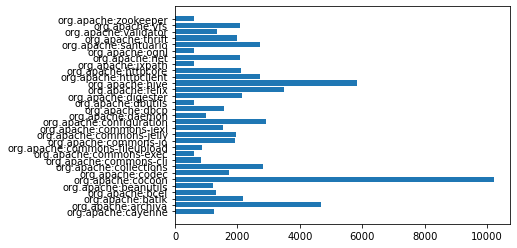

In [46]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Plot bar plots for the categorical variables with few values
bar_plot(sonar_analysis["PROJECT_ID"],sonar_analysis,True)

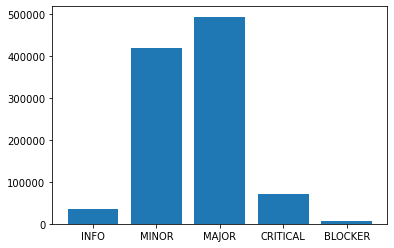

In [47]:
bar_plot(sonar_issues["SEVERITY"],sonar_issues,False)

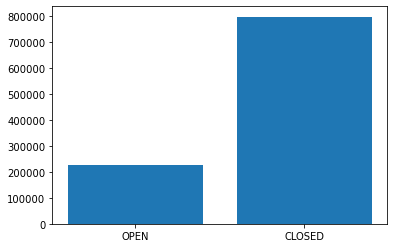

In [48]:
bar_plot(sonar_issues["STATUS"],sonar_issues,False)

## Histogram plots 

In [49]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Plot histogram of all numeric variables in dataframe
print("---------- Git commits ----------")
plot_histogram(git_commits)

---------- Git commits ----------
There are no numerical variables in dataframe


In [50]:
print("---------- Jira issues ----------")
plot_histogram(jira_issues)

---------- Jira issues ----------
There are no numerical variables in dataframe


In [51]:
print("---------- Sonar analysis ----------")
plot_histogram(sonar_analysis)

---------- Sonar analysis ----------
There are no numerical variables in dataframe


---------- Sonar issues ----------


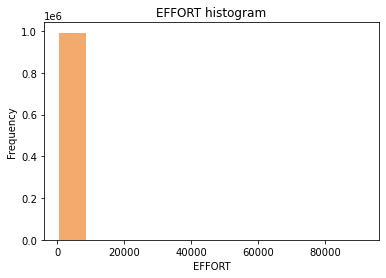

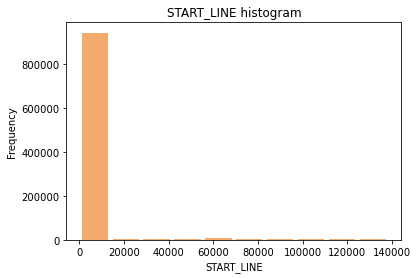

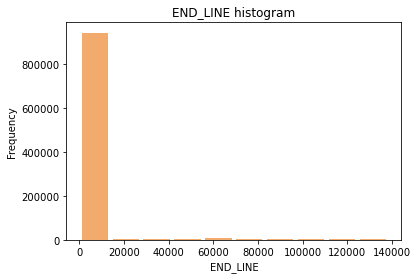

In [52]:
print("---------- Sonar issues ----------")
plot_histogram(sonar_issues)

---------- Sonar measures ----------


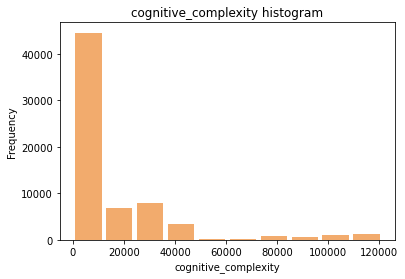

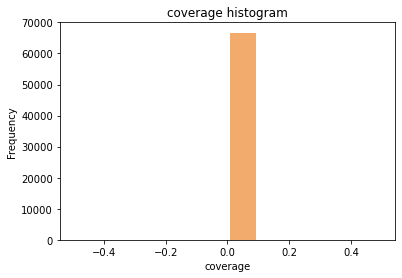

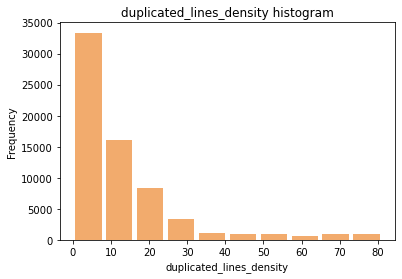

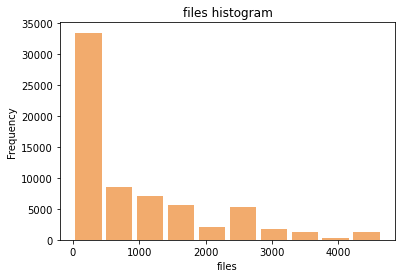

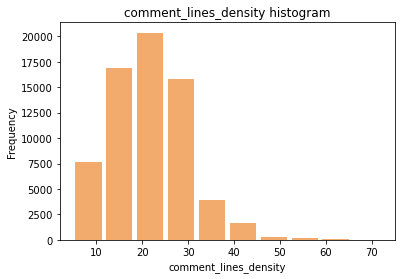

In [53]:
print("---------- Sonar measures ----------")
plot_histogram(sonar_measures)

## Correlation plots 

In [55]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Plot correlation of all numeric variables in dataframe
print("---------- Git commits ----------")
plot_correlatinos(git_commits)

---------- Git commits ----------
There are no numerical variables in dataframe


In [56]:
print("---------- Jira issues ----------")
plot_correlatinos(jira_issues)

---------- Jira issues ----------
There are no numerical variables in dataframe


In [58]:
print("---------- Sonar analysis ----------")
plot_correlatinos(sonar_analysis)

---------- Sonar analysis ----------
There are no numerical variables in dataframe


---------- Sonar issues ----------


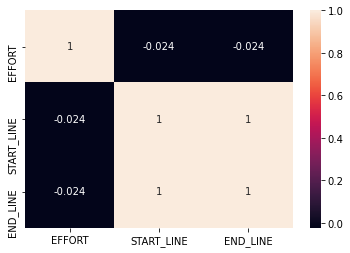

In [60]:
print("---------- Sonar issues ----------")
plot_correlatinos(sonar_issues)

---------- Sonar measures ----------


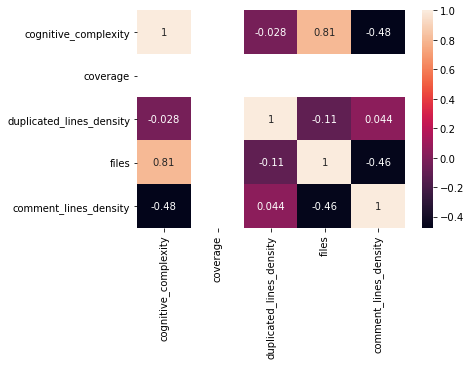

In [61]:
print("---------- Sonar measures ----------")
plot_correlatinos(sonar_measures)